<a href="https://colab.research.google.com/github/Anishpatil-108/LGMVIP-DataScience/blob/main/_TASK3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA SCIENCE INTERN @Lets Grow More LGMVIP October
##Name: Anish Patil
###TASK 3 (INTERMEDIATE LEVEL): Exploratory Data Analysis on Dataset-Terrorism
According to a survey, about 218 million people are affected by calamities, natural and man-made, per annum and about 68000 people loose their lives every year. The frequency of natural disasters have remained broadly constant, but the number of terrorist activities have grown over the period. The aim of this task is to explore the terrorist events around the world. Plots and Graphs are used in this task, for making the exploration easy and more informative.

#IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Global Terrorism - START data.zip',encoding='latin1')

#DATA PROCESSING

In [ ]:
data.shape

(181691, 135)

In [ ]:
data.size

24528285

DATA CLEANING

In [ ]:
data.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','latitude':'Latitude','longitude':'Longitude','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target Type','weaptype1_txt':'Weapon','motive':'Motive'},inplace=True)
data['Casualities'] = data.Killed + data.Wounded
data=data[['Year','Month','Day','Country','Region','City','Latitude','Longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target Type','Weapon']]

In [ ]:
data.head()

,Year,Month,Day,Country,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target Type,Weapon
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [ ]:
data.tail()

,Year,Month,Day,Country,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target Type,Weapon
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,3.0,Checkpoint,Al-Shabaab,Military,Firearms
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,9.0,Hmeymim Air Base,Muslim extremists,Military,Explosives
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,0.0,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,0.0,Office,Unknown,Government (General),Explosives
181690,2017,12,31,Philippines,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,0.0,0.0,Unknown,Unknown,Unknown,Explosives


In [ ]:
data.dtypes

Year             int64
Month            int64
Day              int64
Country         object
Region          object
City            object
Latitude       float64
Longitude      float64
AttackType      object
Killed         float64
Wounded        float64
Casualities    float64
Target          object
Group           object
Target Type     object
Weapon          object
dtype: object

In [ ]:
data.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'City', 'Latitude',
       'Longitude', 'AttackType', 'Killed', 'Wounded', 'Casualities', 'Target',
       'Group', 'Target Type', 'Weapon'],
      dtype='object')

In [ ]:
data.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
Latitude        4556
Longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Casualities    16874
Target           636
Group              0
Target Type        0
Weapon             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   City         181257 non-null  object 
 6   Latitude     177135 non-null  float64
 7   Longitude    177134 non-null  float64
 8   AttackType   181691 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Casualities  164817 non-null  float64
 12  Target       181055 non-null  object 
 13  Group        181691 non-null  object 
 14  Target Type  181691 non-null  object 
 15  Weapon       181691 non-null  object 
dtypes: float64(5), int64(3), object(8)
memory usage: 22.2+ MB


In [ ]:
data.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


#DATA ANALYSIS

In [ ]:
pd.DataFrame(data["Year"].value_counts().head(10))

,Year
2014,16903
2015,14965
2016,13587
2013,12036
2017,10900
2012,8522
2011,5076
1992,5071
2010,4826
2008,4805


In [ ]:
pd.DataFrame(data["Country"].value_counts().head(10))

,Country
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235
Turkey,4292


In [ ]:
pd.DataFrame(data["Region"].value_counts().head(10))

,Region
Middle East & North Africa,50474
South Asia,44974
South America,18978
Sub-Saharan Africa,17550
Western Europe,16639
Southeast Asia,12485
Central America & Caribbean,10344
Eastern Europe,5144
North America,3456
East Asia,802


In [ ]:
pd.DataFrame(data["City"].value_counts().head(10))

,City
Unknown,9775
Baghdad,7589
Karachi,2652
Lima,2359
Mosul,2265
Belfast,2171
Santiago,1621
Mogadishu,1581
San Salvador,1558
Istanbul,1048


In [ ]:
pd.DataFrame(data["Casualities"].value_counts().head(10))

,Casualities
0.0,63297
1.0,30157
2.0,15278
3.0,10273
4.0,7549
5.0,5755
6.0,4244
7.0,3632
8.0,2832
9.0,2309


In [ ]:
pd.DataFrame(data["Group"].value_counts().head(10))

,Group
Unknown,82782
Taliban,7478
Islamic State of Iraq and the Levant (ISIL),5613
Shining Path (SL),4555
Farabundo Marti National Liberation Front (FMLN),3351
Al-Shabaab,3288
New People's Army (NPA),2772
Irish Republican Army (IRA),2671
Revolutionary Armed Forces of Colombia (FARC),2487
Boko Haram,2418


#DATA ANALYSIS OUTPUT

In [ ]:
print('Regions with Highest Terrorist Attacks:',data['Region'].value_counts().index[0])
print('Country with Highest Terrorist Attacks:',data['Country'].value_counts().index[0])
print('City with Highest Terrorist Attacks:',data['City'].value_counts().index[0])
print('Terrorist Groups with Highest Terrorist Attacks:',data['Group'].value_counts().index[0])
print('Year with Highest Terrorist Attacks:',data['Year'].value_counts().index[0])
print('Total number of casualities:',data['Casualities'].max())
print('Most used weapon in Terrorist Attacks:',data['Weapon'].value_counts().index[0])
print('Maximum people killed in an ttack are:',data['Killed'].max(),'that took place in',data.loc[data['Killed'].idxmax()].Country)

Regions with Highest Terrorist Attacks: Middle East & North Africa
Country with Highest Terrorist Attacks: Iraq
City with Highest Terrorist Attacks: Unknown
Terrorist Groups with Highest Terrorist Attacks: Unknown
Year with Highest Terrorist Attacks: 2014
Total number of casualities: 9574.0
Most used weapon in Terrorist Attacks: Explosives
Maximum people killed in an ttack are: 1570.0 that took place in Iraq


#DATA VISUALIZATION

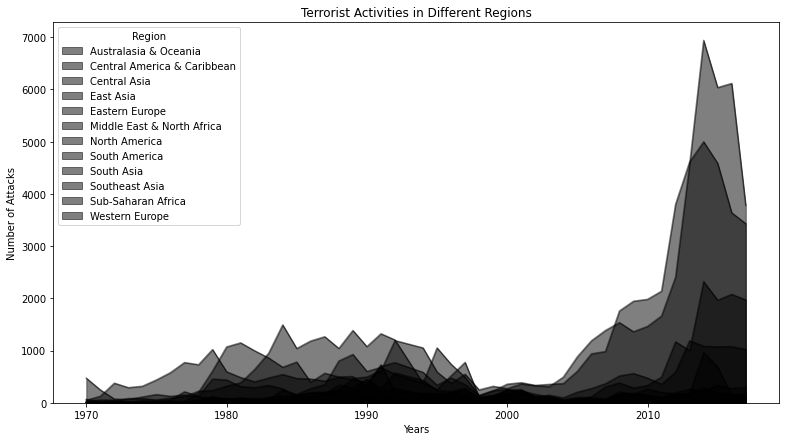

In [ ]:
pd.crosstab(data.Year , data.Region).plot(kind = 'area' , stacked = False , figsize = (13,7), color= 'black')
plt.title('Terrorist Activities in Different Regions')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
plt.show()

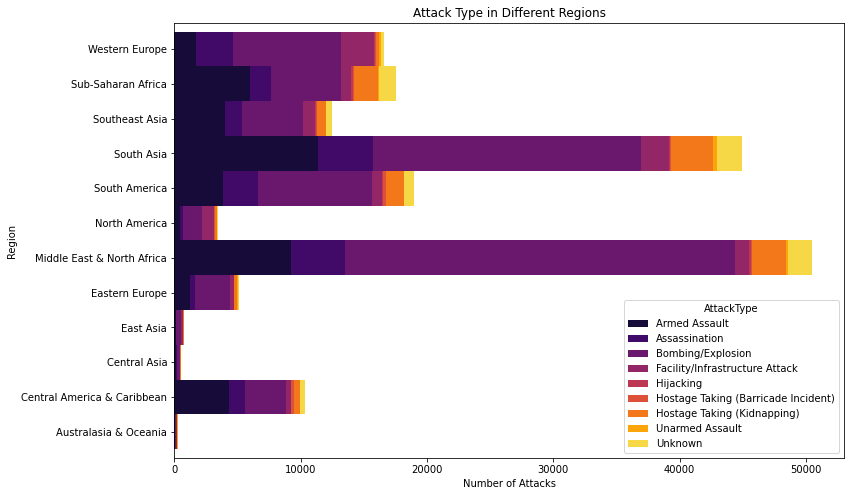

In [ ]:
pd.crosstab(data.Region,data.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('inferno',9))
plt.title('Attack Type in Different Regions')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

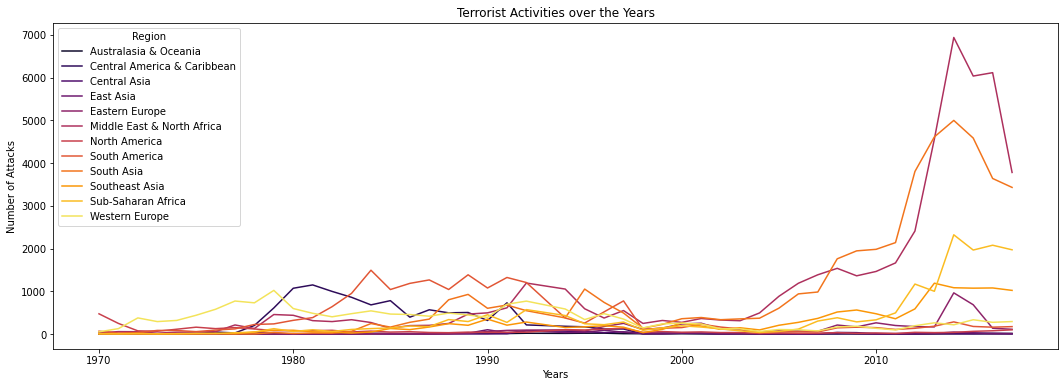

In [ ]:
data_region=pd.crosstab(data.Year, data.Region)
data_region.plot(color=sns.color_palette('inferno',12))
plt.title('Terrorist Activities over the Years')
plt.xlabel('Years')
plt.ylabel('Number of Attacks')
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

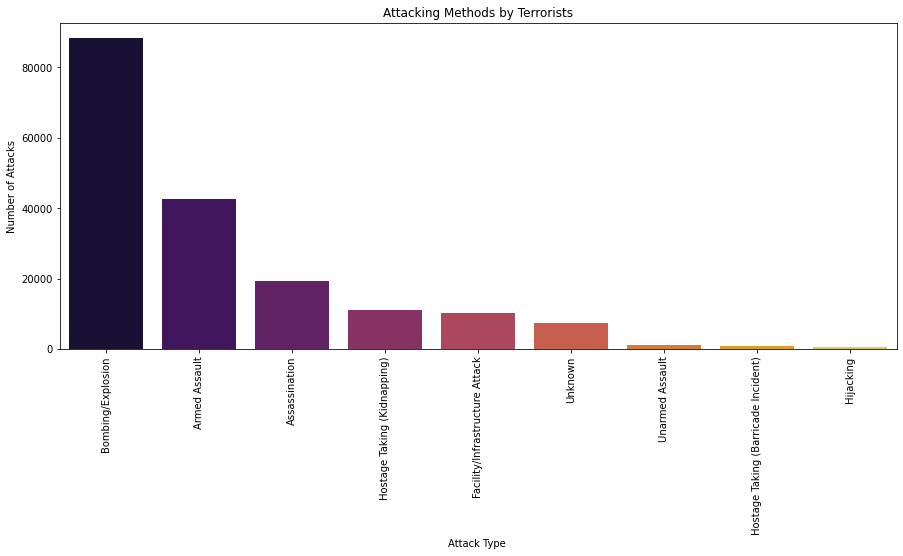

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType', data=data, palette='inferno',order=data['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Type ')
plt.ylabel('Number of Attacks')
plt.title('Attacking Methods by Terrorists')
plt.show()

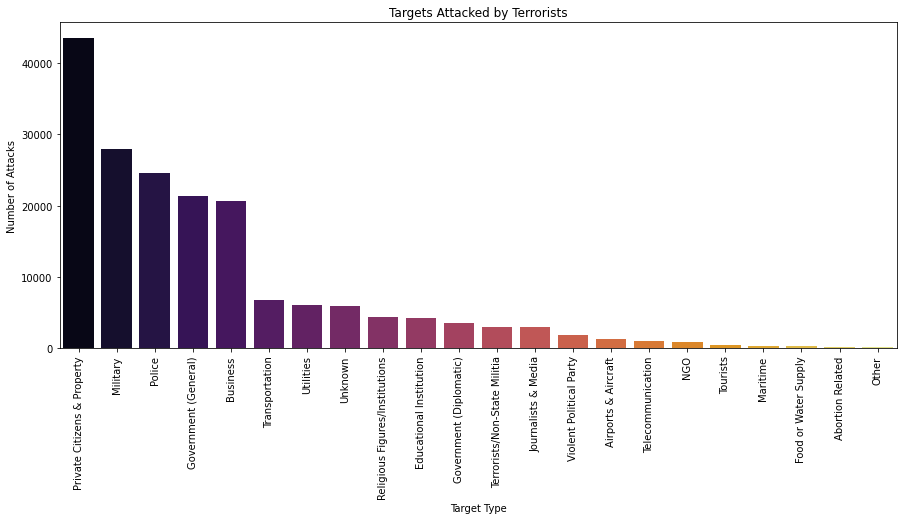

In [ ]:
plt.subplots(figsize=(15,6)) 
sns.countplot(data['Target Type'],palette='inferno',order=data['Target Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Targets Attacked by Terrorists')
plt.xlabel('Target Type')
plt.ylabel('Number of Attacks')
plt.show()

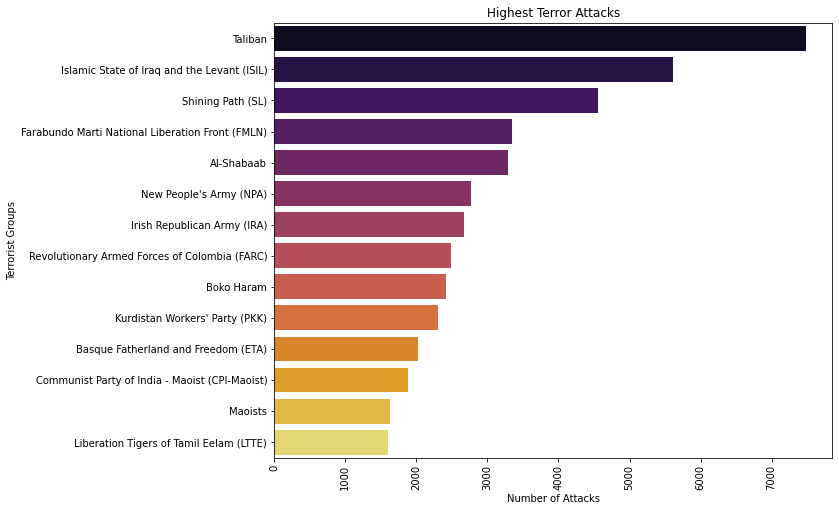

In [ ]:
sns.barplot(data['Group'].value_counts()[1:15].values,data['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xlabel('Number of Attacks')
plt.ylabel('Terrorist Groups')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Highest Terror Attacks')
plt.show()



---


##CONCLUSION 

---

---




####**Iraq** is the Country with the Highest Terrorist Attacks.
####**Middle East & North Africa** is the Regions with Highest Terrorist Attacks. 
####**Baghdad** is the City with Highest Terrorist Attacks.
####**Taliban** Terrorist Groups has Highest Terrorist Attacks till date.
####**2014** was the Year with Highest number of Terrorist Attacks and Casualities.
####**9574** was the Highest Number of Casualities reported in an Year.
####**Explosives** are the most used weapon in Terrorist Attacks.
####Maximum people killed in an attack were **1570** which took place in **Iraq**.

---



---


Even though the number of terrorist attacks have declined between 2016 to 2020 the threat of the ever increasing terrorist group is still prevalent. Also, with the rise of Taliban once again in the Middle East we must be vigilant and should resort to counter-attacks if the situations worsen. Thank You. 


---

